In [102]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

Training accuracy: 0.9397058823529412
First testing accuracy: 0.93
Second testing accuracy: 0.95


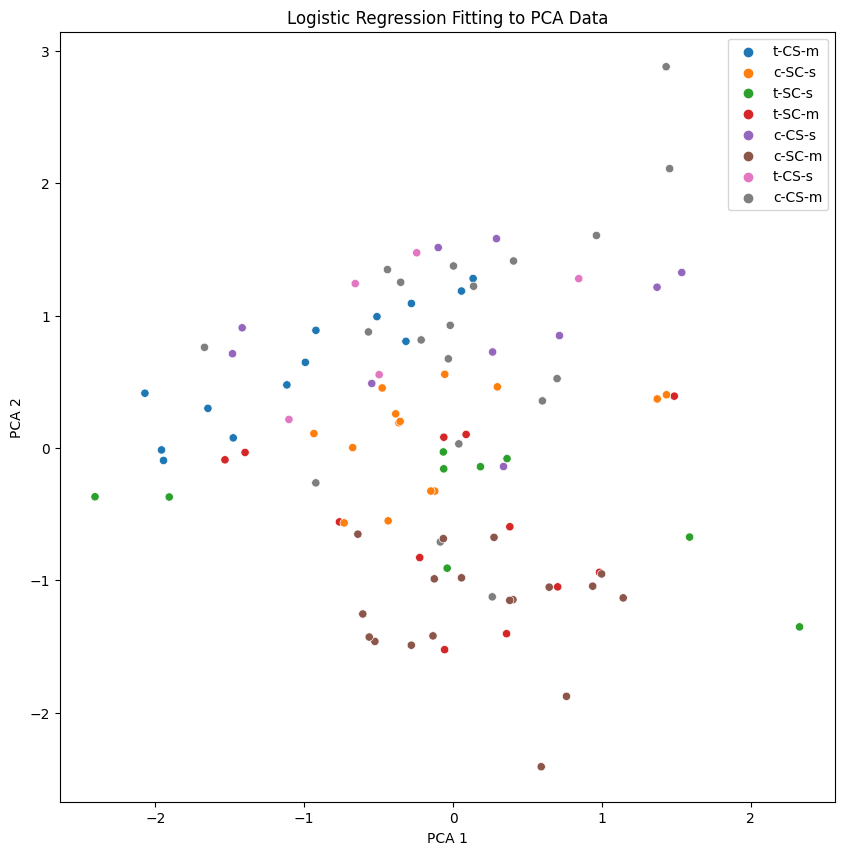

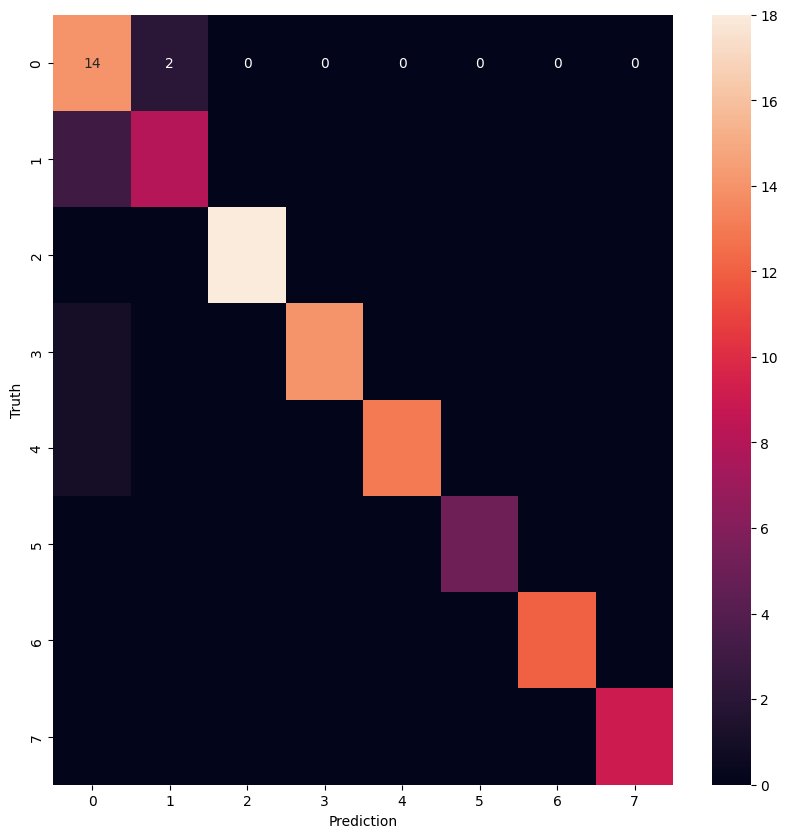

In [103]:
# Load the data
training_data = pd.read_csv("/Users/dominicranelli/Downloads/mouse_training.csv")
testing_data = pd.read_csv("/Users/dominicranelli/Downloads/mouse_testing1.csv")
testing_data2 = pd.read_csv("/Users/dominicranelli/Downloads/mouse_testing2.csv")

# Drop first column
training_data = training_data.drop(columns=["Unnamed: 0"])
testing_data = testing_data.drop(columns=["Unnamed: 0"])
testing_data2 = testing_data2.drop(columns=["Unnamed: 0"])

# Split data into features and labels
X_train = training_data.drop(columns=["class", "MouseID", "Genotype", "Treatment", "Behavior"])
y_train = training_data["class"]
X_test = testing_data.drop(columns=["class", "MouseID", "Genotype", "Treatment", "Behavior"])
X_test = pd.DataFrame(X_test, columns=X_train.columns)
X_test2 = testing_data2.drop(columns=["class", "MouseID", "Genotype", "Treatment", "Behavior"])
X_test2 = pd.DataFrame(X_test2, columns=X_train.columns)
y_test = testing_data["class"]
y_test2 = testing_data2["class"]

# Remove columns with missing values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
X_test2 = X_test2.fillna(X_test2.mean())

# Perform PCA 
pca = PCA(n_components=28)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_test2 = pca.transform(X_test2)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(X_test2)

log_reg = LogisticRegression()

# Fit model
log_reg.fit(X_train, y_train)

# Predict test data
y_pred = log_reg.predict(X_test)
y_pred2 = log_reg.predict(X_test2)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_test2, y_pred2)

print('Training accuracy:', train_accuracy)
print('First testing accuracy:', accuracy)
print('Second testing accuracy:', accuracy2)

# Create a plot of Logistic Regression fitting to the data
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Logistic Regression Fitting to PCA Data")
plt.show()

# Plot confusion matrix with class labels
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()



Training accuracy: 0.9397058823529412
First testing accuracy: 0.98
Second testing accuracy: 0.94


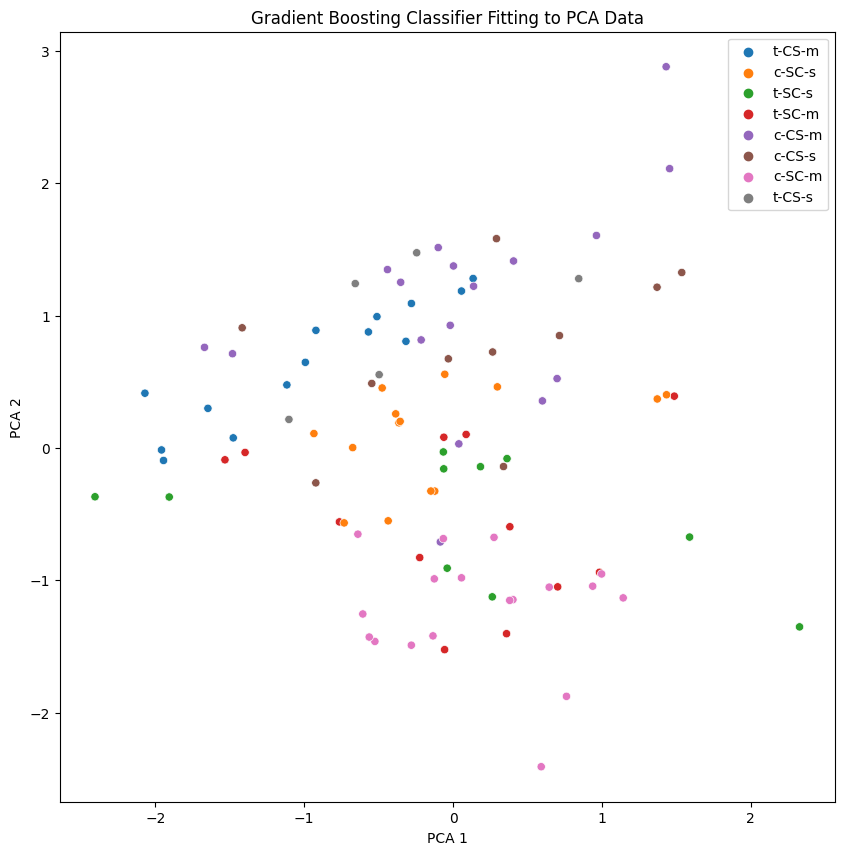

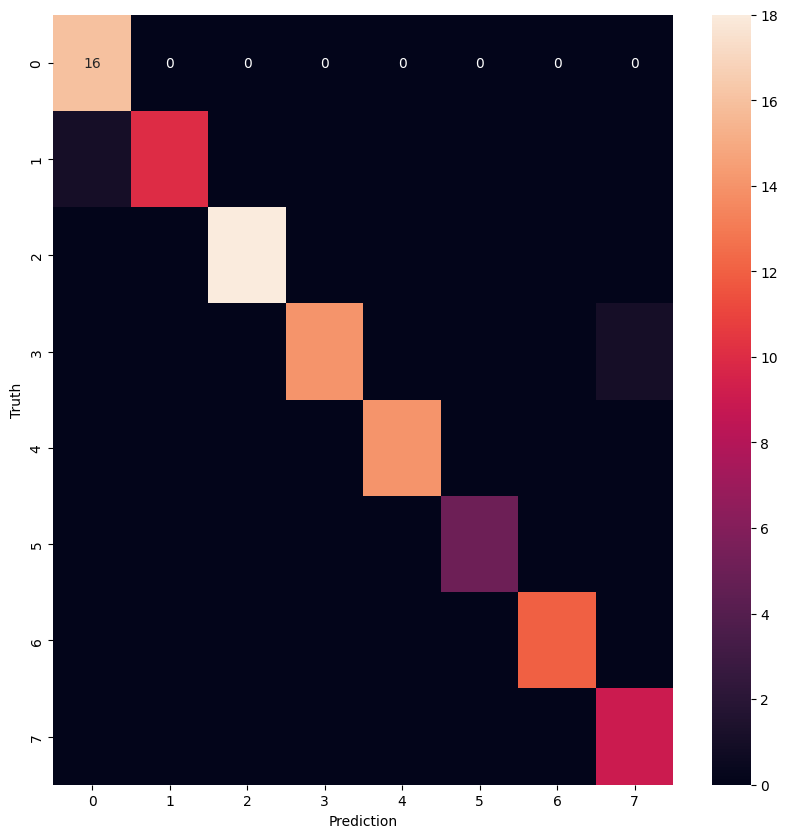

In [104]:
# Gradient Boosting Tree on the data

gdc = GradientBoostingClassifier()

# Fit model
gdc.fit(X_train, y_train)

# Predict test data
y_pred = gdc.predict(X_test)
y_pred2 = gdc.predict(X_test2)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_test2, y_pred2)

print('Training accuracy:', train_accuracy)
print('First testing accuracy:', accuracy)
print('Second testing accuracy:', accuracy2)

# Create a plot of GDT fitting to the data
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Gradient Boosting Classifier Fitting to PCA Data")
plt.show()

# Plot confusion matrix with class labels
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

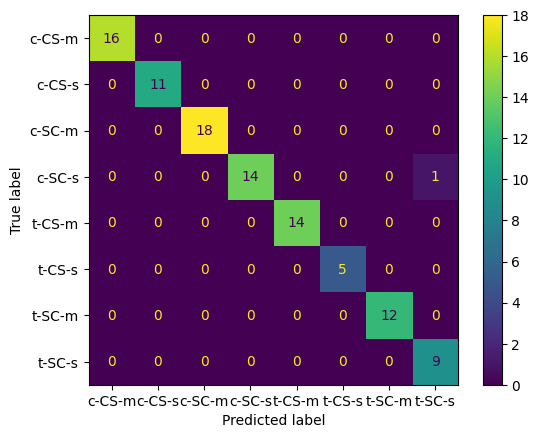

Validation Accuracy: 0.99


In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random forest on training data

rfc = RandomForestClassifier(max_depth=7, bootstrap=True)
rfc.fit(X_train, y_train)
rfc_test_predictions = rfc.predict(X_test)

# creating a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rfc_test_predictions)
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test, rfc_test_predictions)
print(f"Validation Accuracy: {accuracy_validation}")

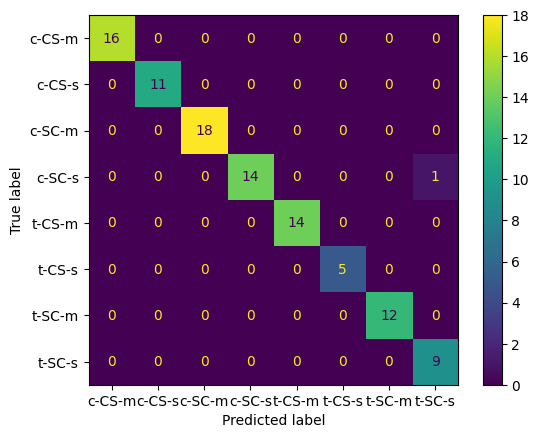

Testing Accuracy: 0.99


In [110]:
#Random forest predictions on first test set
rfc_test_predictions = rfc.predict(X_test)

# creating a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rfc_test_predictions)
plt.show()

# print(rfc_predictions)

accuracy_testing = accuracy_score(y_test, rfc_test_predictions)
print(f"Testing Accuracy: {accuracy_testing}")

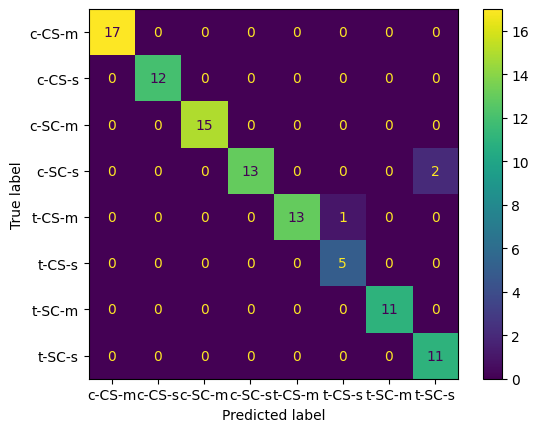

Testing Accuracy: 0.97


In [106]:
#Random forest predictions on second test set
rfc_test2_predictions = rfc.predict(X_test2)

# creating a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test2, rfc_test2_predictions)
plt.show()

# print(rfc_predictions)

accuracy_testing = accuracy_score(y_test2, rfc_test2_predictions)
print(f"Testing Accuracy: {accuracy_testing}")


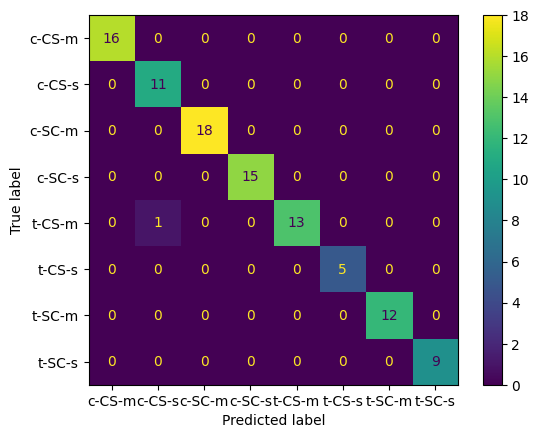

Validation Accuracy: 0.99


In [111]:
from sklearn.neural_network import MLPClassifier

# Neural network on training data
clf = MLPClassifier(solver='lbfgs', alpha=1e-05, hidden_layer_sizes=(50,), random_state=1)

clf.fit(X_train, y_train)

nnresults = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test, nnresults)
print(f"Validation Accuracy: {accuracy_validation}")

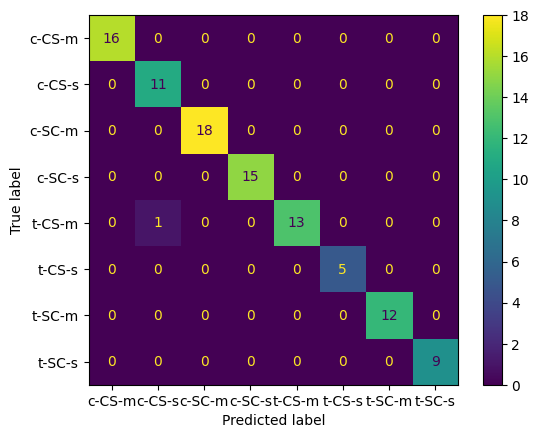

Validation Accuracy: 0.99


In [112]:
clf.fit(X_train, y_train)

nnresults = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test, nnresults)
print(f"Validation Accuracy: {accuracy_validation}")

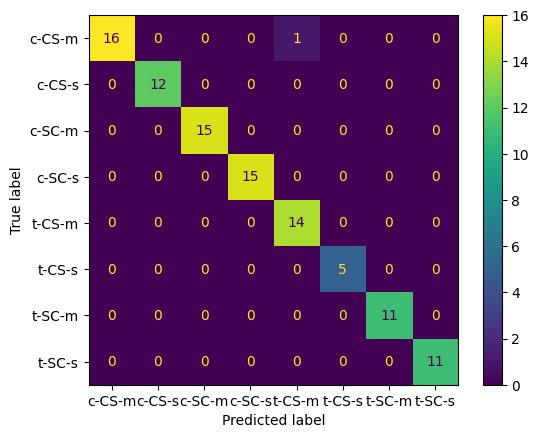

Testing Accuracy: 0.99


In [113]:
nnresults = clf.predict(X_test2)
ConfusionMatrixDisplay.from_predictions(y_test2, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_testing = accuracy_score(y_test2, nnresults)
print(f"Testing Accuracy: {accuracy_testing}")